In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [11]:
# Load the dataset
df = pd.read_csv("Results_21Mar2022.csv")

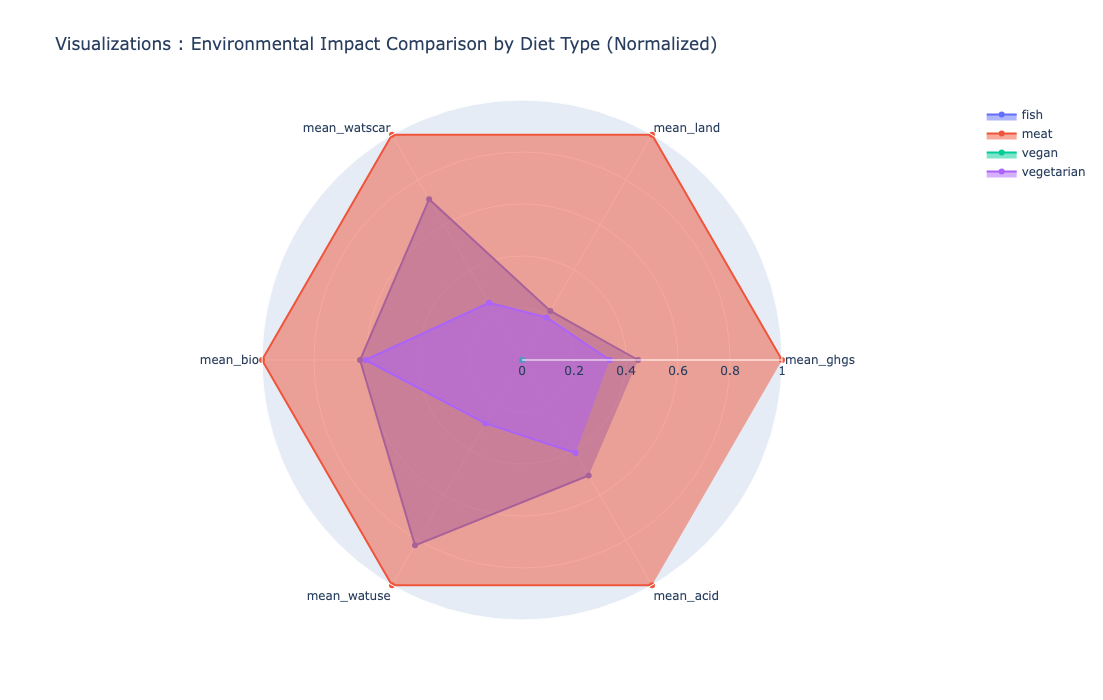

In [12]:
# Simplify diet group labels for clearer categorization
df['diet_group_simplified'] = df['diet_group'].replace({
    'veggie': 'vegetarian',
    'meat50': 'meat',
    'meat100': 'meat'
})

# Define the environmental impact metrics to include in the radar chart
radar_vars = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_bio', 'mean_watuse', 'mean_acid']

# Group the data by diet type and calculate the average for each variable
df_radar = df.groupby('diet_group_simplified')[radar_vars].mean()
# Normalize the values to range [0, 1] for comparison across metrics
df_radar_norm = (df_radar - df_radar.min()) / (df_radar.max() - df_radar.min())

# Initialize a radar chart figure
fig = go.Figure()
# Add a polygon (filled radar trace) for each diet type
for diet in df_radar_norm.index:
    fig.add_trace(go.Scatterpolar(
        r=df_radar_norm.loc[diet].values,
        theta=radar_vars,
        fill='toself',
        name=diet
    ))

# Update layout settings for the radar chart
fig.update_layout(
    width=800,   
    height=700,  
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    title="Visualizations : Environmental Impact Comparison by Diet Type (Normalized)",
    showlegend=True
)

# Display the radar chart
fig.show()